#### Graph inspector
Demonstration of the functionality in GraphInspector. Rough overview of implemented features:
- Graph visualization: Mesh, Grid, Encoder, Decoder
- Checking for orphans: Quickcheck and plotting
- Edge weights statistics

In [17]:
%load_ext autoreload
%autoreload 2


In [1]:
from GraphInspector import GraphInspector


# Initialize a Graph inspector either with the path to the graph file or an allready loaded graph.
path_to_graph = '/lustre/storeB/project/fou/hi/foccus/mateuszm/ocean-ai/graph/graph.pt'
path_to_output = ''

# Specify mesh and grid key - these are the keys in the graph dict.
graph = GraphInspector(path_to_graph, grid_key = 'data', hidden_key = 'hidden', coords_key='x')

#### Graph visualization
The graph visualization tools are all set up to return (fig, ax), as this makes it slighly easier to adjust xlim and ylim without having to re-generate the plot. You can also specify xlim, ylim and save_path.

(<Figure size 1200x600 with 1 Axes>, <GeoAxes: >)

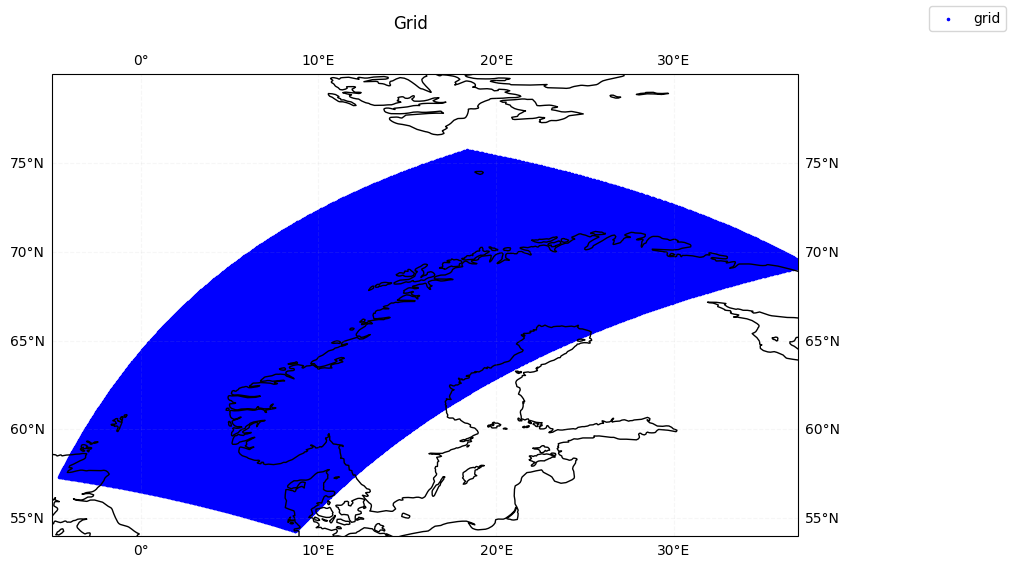

In [2]:
# Grid
xlim = (-5, 37) #Degrees east [-180, 180]
ylim = (54, 80)
graph.plot_grid(xlim=xlim, ylim=ylim)

(<Figure size 1200x600 with 1 Axes>, <GeoAxes: >)

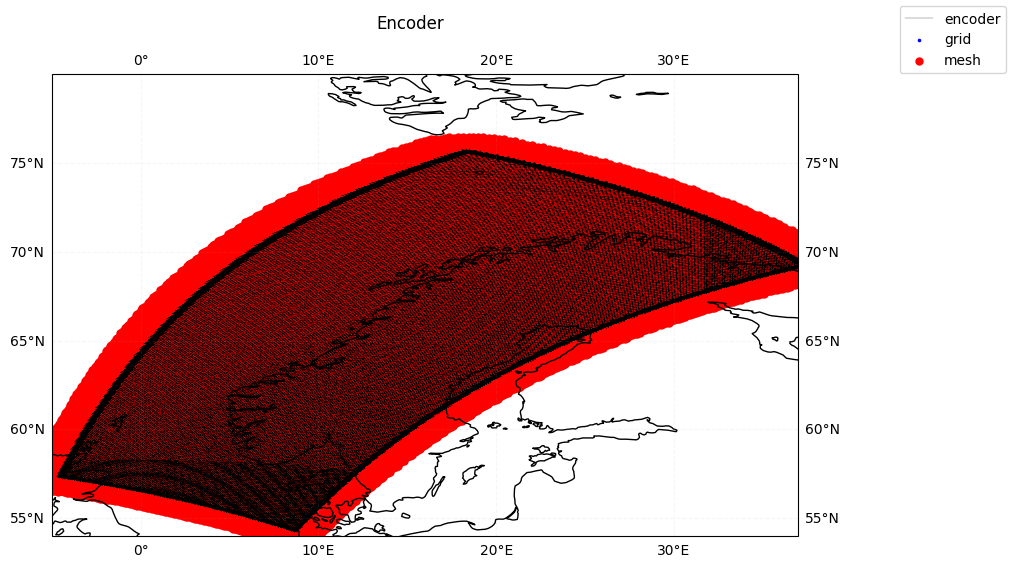

In [13]:
# Encoder
graph.plot_encoder(xlim=xlim, ylim=ylim)

(<Figure size 1200x600 with 1 Axes>, <GeoAxes: >)

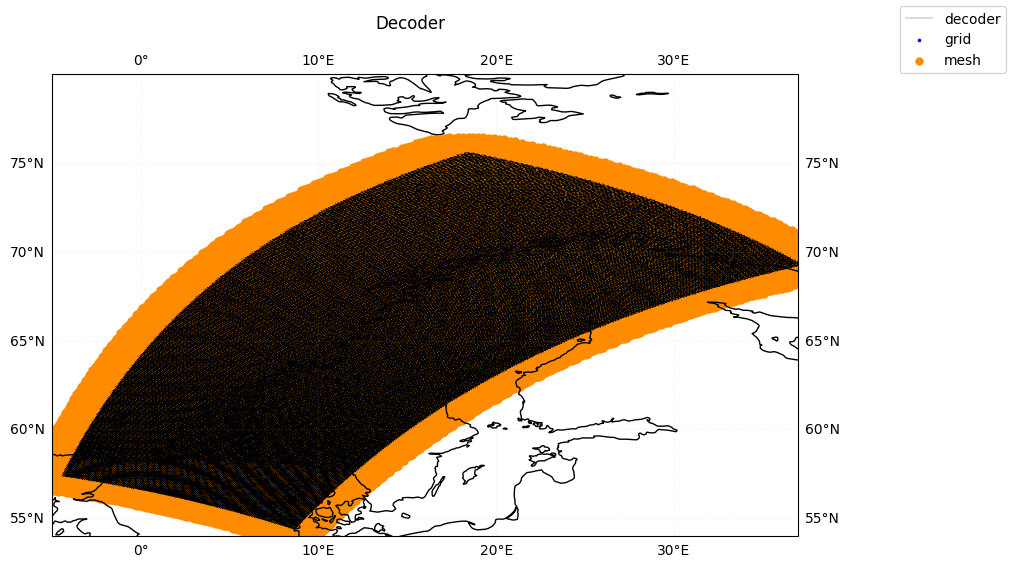

In [11]:
# Decoder 
graph.plot_decoder(xlim=xlim, ylim=ylim)

In [12]:
# Mesh
graph.plot_mesh(xlim=xlim, ylim=ylim)

KeyError: 'x'

In [ ]:
# Zooming
xlim = (-7, 5) #Degrees east [-180, 180]
ylim = (50, 55) #Degrees north [-90,90]
graph.plot_encoder(xlim=xlim, ylim=ylim)

(<Figure size 1200x600 with 2 Axes>, <GeoAxes: >)

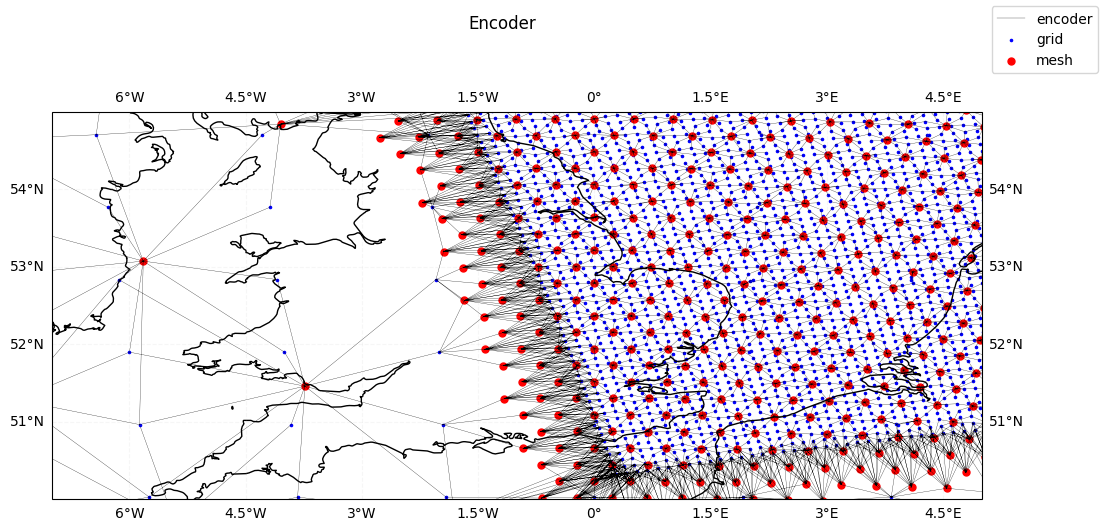

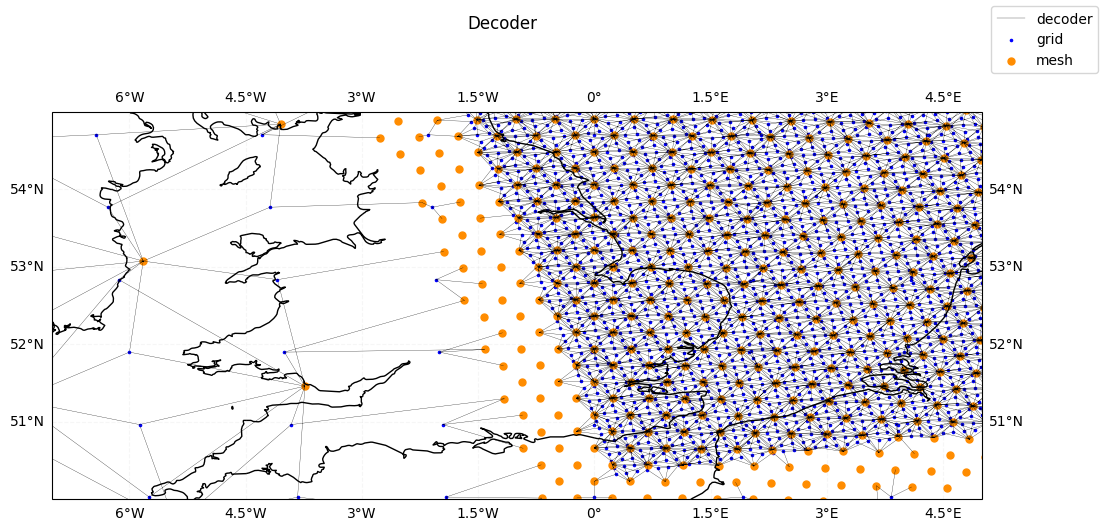

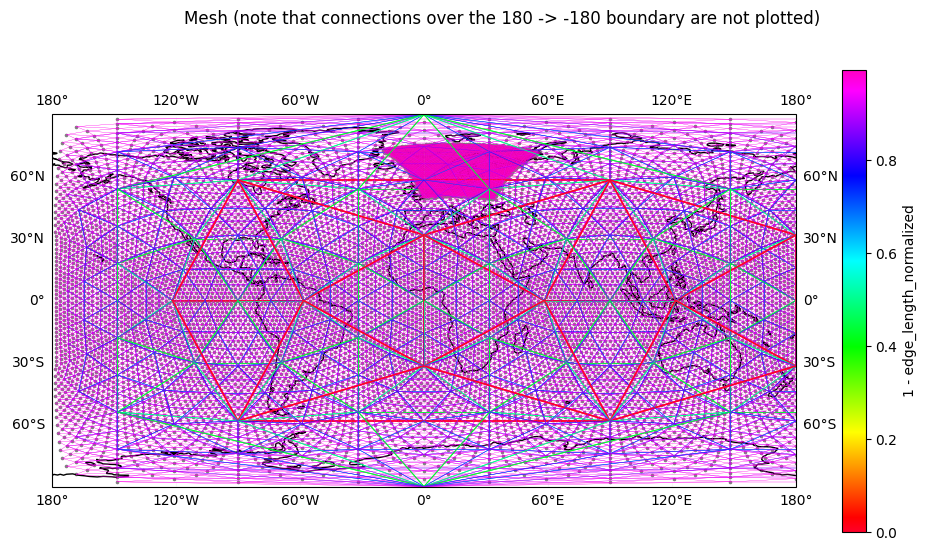

In [2]:
# Saving
xlim = (-7, 5)
ylim = (50, 55)
graph.plot_encoder(xlim=xlim, ylim=ylim, save_path=path_to_output + 'encoder_zoom.png')
graph.plot_decoder(xlim=xlim, ylim=ylim, save_path=path_to_output + 'decoder_zoom.png')
graph.plot_mesh(save_path=path_to_output + 'multimesh_global.png')


In [8]:
# Change xlim and ylim without having to remake the whole plot:
'''
fig, ax = graph.plot_mesh()
'''

In [9]:
'''
xlim = (20,40)
ylim = (60,80)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
fig.savefig('test.png') #Have to open this in the folder to look at result, atleast fig.show() doesnt work
                        # for me in notebook
'''

"\nxlim = (20,40)\nylim = (60,80)\nax.set_xlim(xlim)\nax.set_ylim(ylim)\nfig.savefig('test.png') #Have to open this in the folder to look at result, atleast fig.show() doesnt work\n                        # for me in notebook\n"

#### Checking for orphans
When making a new graph a nice quickcheck is to see if we have orphans (dead nodes with zero connections)

In [ ]:
# Quickcheck:
graph.has_orphans()

In [ ]:
# Plot these:
graph.plot_orphans()

#### Statistics for edge weights
Shows histogram for edge weights (1 - edge_length_normalized) in graph, mesh, encoder decoder. These can be usefull to check that we have distinct signals from the local and global parts of the graph.

In [ ]:
graph.plot_edge_weights_histogram()

In [7]:
aw = graph.area_weights
lats = graph.grid_lats
lons = graph.grid_lons

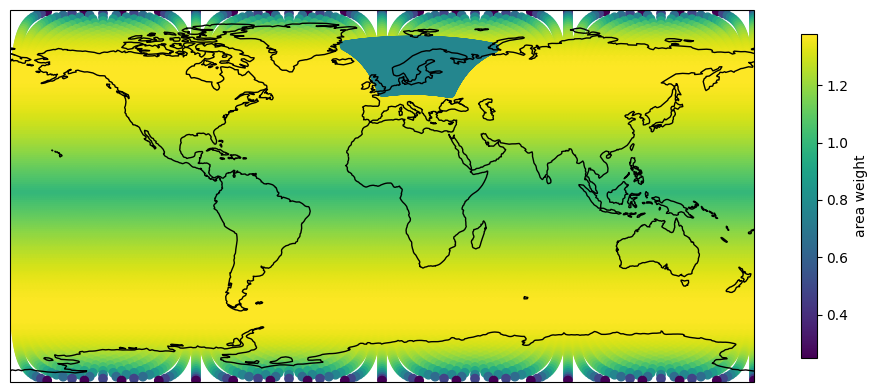

In [20]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
fig, ax = plt.subplots(figsize=(12,6), subplot_kw=dict(projection=ccrs.PlateCarree()))
ax.coastlines()
c = ax.scatter(lons, lats, c=aw, label='area weight')
fig.colorbar(c, ax=ax, label='area weight', shrink=0.7)

(<Figure size 1200x600 with 2 Axes>, <GeoAxes: >)

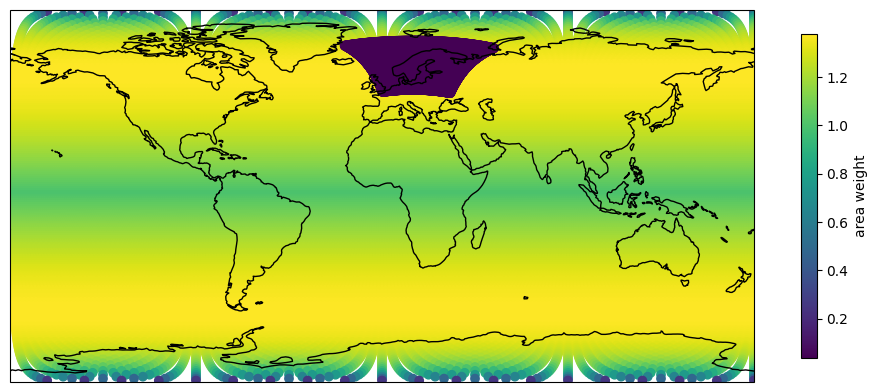

In [9]:
graph.plot_area_weights()